In [3]:
"""This code calculates the Walsh angles a_j and indices j for the diagonal unitary gate U(t). Then, it draws the corresponding quantum circuit."""


from qiskit import QuantumCircuit
import numpy as np
from qiskit.circuit import Parameter
from qiskit.visualization import circuit_drawer

# Define the dimension d and calculate the number of qubits q
d = 16
q = 2 * int(np.ceil(np.log(d) / np.log(2)))

# Initialize angles and indices arrays
num_angles = int(q**2/4 + q)
a_j = np.zeros(num_angles, dtype=int)
indices = np.zeros(num_angles, dtype=int)

# Pre-calculate constants for angle computations
result_h1 = (d**2)*(1+d)*d/8
result_h2 = -d**4/16

# Calculate angles and indices
for j1 in range(int(q/2)):
    base_index = j1 + (j1+1)*int(q/2)
    
    a_j[j1] = result_h1/(2**j1)
    a_j[base_index] = a_j[j1]
    
    indices[j1] = 2**j1
    indices[base_index] = 2**(j1 + int(q/2))

    for j2 in range(int(q/2)):
        offset_index = base_index + j2 + 1
        a_j[offset_index] = result_h2/(2**(j2+j1))
        indices[offset_index] = indices[base_index] + 2**j2

#Show the results for both a_j and j
print ("Walsh angles:",a_j)
print ("Indices:",indices)

Walsh angles: [ 8704  4352  2176  1088  8704 -4096 -2048 -1024  -512  4352 -2048 -1024
  -512  -256  2176 -1024  -512  -256  -128  1088  -512  -256  -128   -64]
Indices: [  1   2   4   8  16  17  18  20  24  32  33  34  36  40  64  65  66  68
  72 128 129 130 132 136]


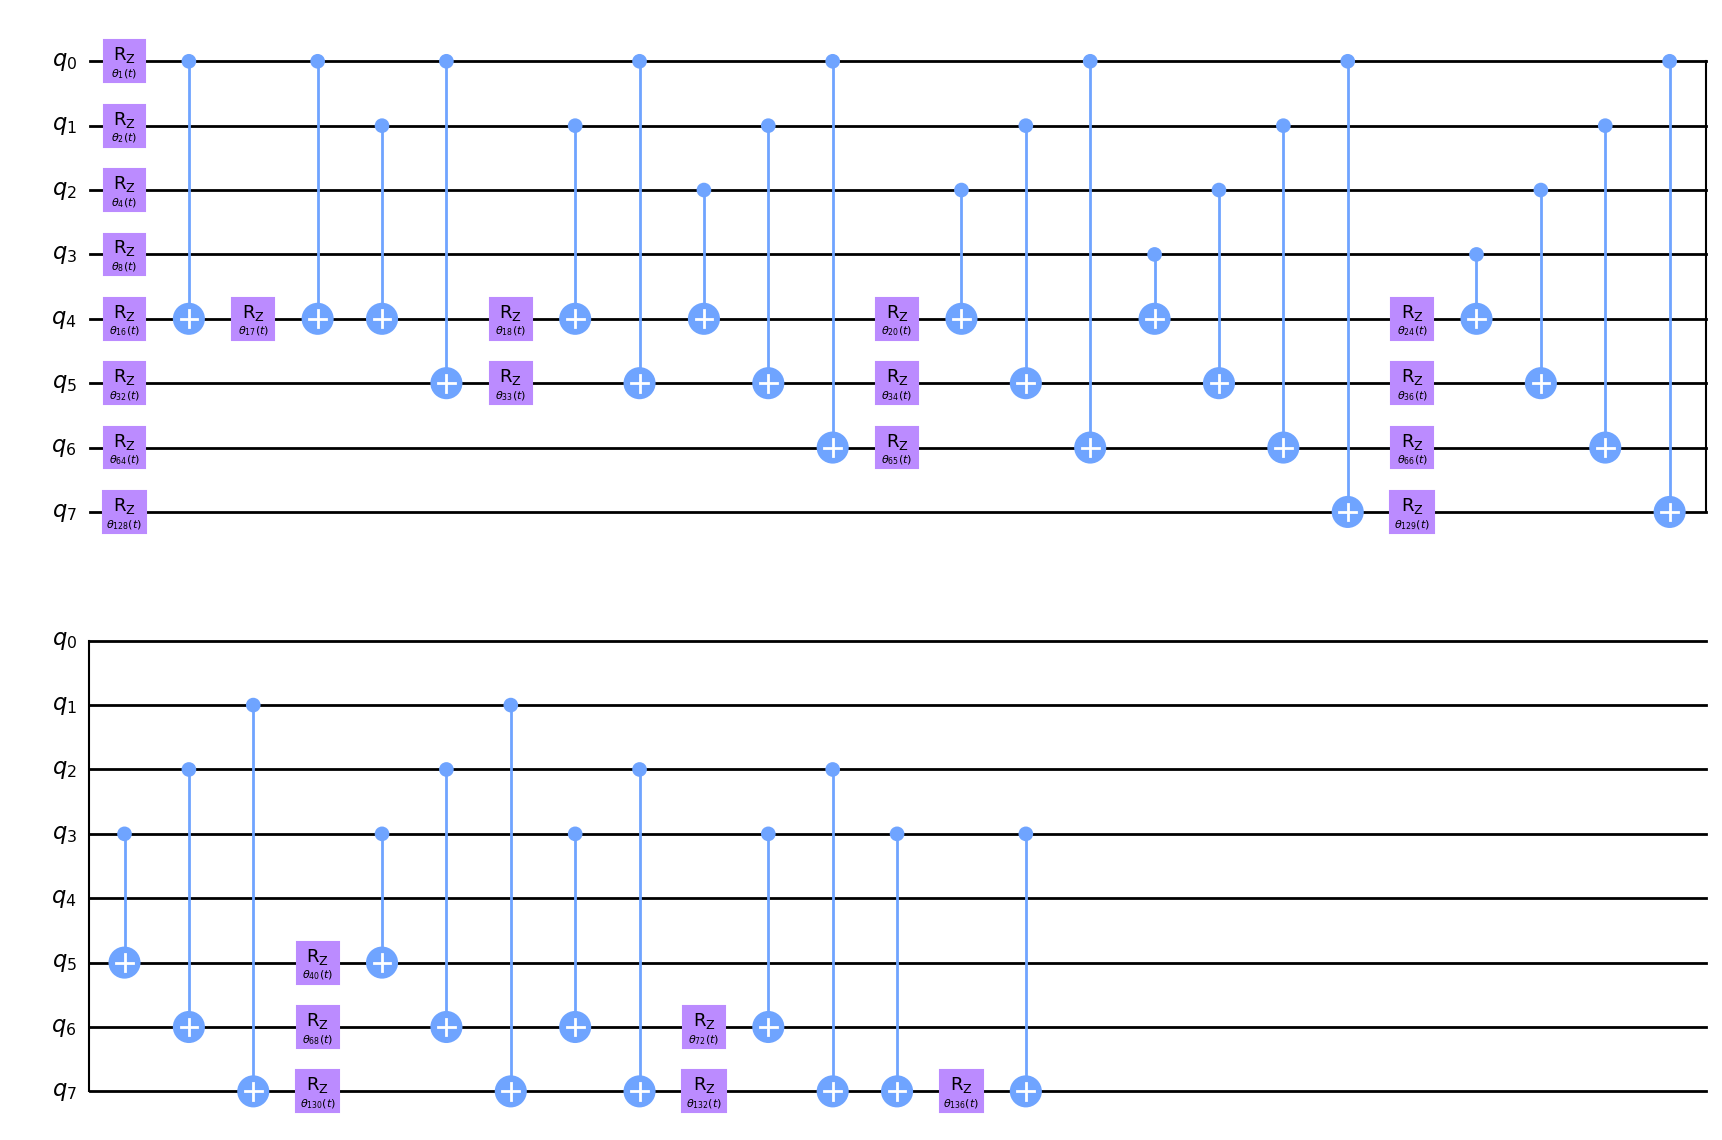

In [4]:
# Create a Quantum Circuit
QuantumCircuit = QuantumCircuit(q)

# Symbolically define the relevant angles theta_j(t) = -2a_j(t) = -2(wt/d²)a_j
theta_j = {index: Parameter(f'$θ_{{{index}}}(t)$') for index in np.unique(indices)}

# Function to apply controlled operations and rotation
def portas(position):
    binary_str = format(indices[position], f'0{q}b')[::-1]    
    msb_index = binary_str.rfind('1')

    # Apply controlled operations
    for i in range(q):
        if binary_str[i] == '1':
            if i != msb_index:
                QuantumCircuit.cx(i, msb_index)
    
    # Apply rotation gate
    QuantumCircuit.rz(theta_j[indices[position]], msb_index)
    
    # Apply controlled operations in reverse order
    for i in reversed(range(q)):
        if binary_str[i] == '1':
            if i != msb_index:
                QuantumCircuit.cx(i, msb_index)

# Apply gates based on the calculated angles and indices
for position in range(num_angles):
    portas(position)

# Display the circuit
QuantumCircuit.draw(output='mpl')